# Problem Set 1: Analysis of racial disparities in felony sentencing

Reshmi (Mia) Anwar, Alexa Strauss, Jovana Nikitovic

# 0. Load packages and imports

In [77]:
## basic functionality
import pandas as pd
import numpy as np
import re

## can add others if you need them

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [78]:
df = sentencing_asof0405 = pd.read_csv("/Users/reshmianwar/Desktop/qss20/pset1_inputdata/sentencing_asof0405.csv")

/var/folders/q4/7sz5khj51k3c5cv3fz08lsb40000gn/T/ipykernel_89044/4215747078.py:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = sentencing_asof0405 = pd.read_csv("/Users/reshmianwar/Desktop/qss20/pset1_inputdata/sentencing_asof0405.csv")


## 0.2: Print head, dimensions, info (0 points)

In [81]:
df.head()
df.shape
df.info()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


(248146, 41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  int64  
 1   CASE_PARTICIPANT_ID                248146 non-null  int64  
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  int64  
 6   CHARGE_VERSION_ID                  248146 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2427

# Part one: data cleaning/interpretation

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [100]:
# Printing the number of unique values for case_id, case_participant_id, and charge_id
df[["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID"]].nunique()

## There are more unique people than unique cases because a case can involve multiple people

# Example below:
case_cts = df.CASE_ID.value_counts()
case_cts[case_cts > 50] # large cases (involving more than 50 ppl)
case_cts[case_cts > 1].head(10) # top 10 cases involving multiple people

## There are more unique charges than unique people because a person can have multiple charges or reoffend:
# (i.e. if they committed multiple severities of crimes requiring multiple charge types;
# e.g. murder and assault and domestic violence at the same time, appearing in the same case, for that same participant)

# Example below:
participant_cts = df.CASE_PARTICIPANT_ID.value_counts()
participant_cts[participant_cts > 40] # participants reappearing in the df more than 40 times


CASE_ID                197519
CASE_PARTICIPANT_ID    211977
CHARGE_ID              229015
dtype: int64

CASE_ID
181880245351    124
210642026541     92
213788534740     74
401360132899     59
213254130589     57
228477967001     54
Name: count, dtype: int64

CASE_ID
181880245351    124
210642026541     92
213788534740     74
401360132899     59
213254130589     57
228477967001     54
223802407959     49
241158280496     47
224801166582     45
401508456118     42
Name: count, dtype: int64

CASE_PARTICIPANT_ID
179640159105    99
202888754974    81
204215911473    74
764908059450    59
213339345634    54
220369604003    48
213860657766    47
765357365579    42
Name: count, dtype: int64

In [102]:
# Print the mean and median number of charges per case/participant

# Print the mean and median number of charges per case:
charges_per_case = df.groupby("CASE_ID")["CHARGE_ID"].count()
charges_per_case.apply(["mean", "median"])

# Print the mean and median number of charges per participant:
charges_per_participant = df.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].count()
charges_per_participant.apply(["mean", "median"])

# Print the mean and median number of participants per case
participants_per_case = df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].count()
participants_per_case.apply(["mean", "median"])


mean      1.256315
median    1.000000
Name: CHARGE_ID, dtype: float64

mean      1.170627
median    1.000000
Name: CHARGE_ID, dtype: float64

mean      1.256315
median    1.000000
Name: CASE_PARTICIPANT_ID, dtype: float64

In [104]:
# Does the data seem to enable us to follow the same defendant across different cases they're charged in?

# Explanation + Examples:

df.groupby("CASE_PARTICIPANT_ID")["CASE_ID"].nunique().sort_values(ascending=False)

# Notice how these are all 1s --> what this means is that each participant is tied to a unique case,
# or in other words, the CASE_PARTICIPANT_ID is specific to that case; if it were the case that CASE_PARTICIPANT_ID
# stayed the same for a person who reoffended in the future, this CASE_PARTICIPANT_ID would appear again, but now associated
# with the new crime, with a new CASE_ID. But since this is not the case (i.e. for each CASE_PARTICIPANT_ID, the number 
# of UNIQUE CASE_IDs (and not the COUNT of CASE_IDs) would have to be >1) that signifies that CASE_PARTICIPANT_ID is not something
# like e.g. your government ID that stays the same for the rest of your life --> it's tied to that particular case

# notice how it's the charges causing this repetition:
df.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].nunique().sort_values(ascending=False)

# thus, even though the df.groupby("CASE_PARTICIPANT_ID")["CASE_ID"].count() may be
# greater than 1 for certain participants, that's different from df.groupby("CASE_PARTICIPANT_ID")["CASE_ID"].nunique(),
# so we should be very careful about this distinction.


CASE_PARTICIPANT_ID
96757475659     1
811339945611    1
811332962067    1
811333245184    1
811333433928    1
               ..
751606861577    1
751611013954    1
751611485815    1
751611957677    1
905535215556    1
Name: CASE_ID, Length: 211977, dtype: int64

CASE_PARTICIPANT_ID
179640159105    99
202888754974    81
204215911473    74
764908059450    59
213339345634    54
                ..
754193509696     1
754194453418     1
754195397140     1
754196152118     1
905535215556     1
Name: CHARGE_ID, Length: 211977, dtype: int64

## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


#### What are the differences between OFFENSE_CATEGORY and UPDATED_OFFENSE_CATEGORY?

#### Answer:
##### The "Offense_Category" refers to the broad classification of a crime at the early stages of a case, before specific charges have been formally filed. It represents an initial assessment of the offense based on the circumstances at the time of arrest or investigation. This category helps to give a general understanding of the nature of the crime (e.g., Aggravated DUI, Narcotics, Unlawful Use of Weapon), but it is subject to change as more information comes to light or as legal proceedings progress. On the other hand, the "Updated_Offense_Category" is the final classification of the crime based on the primary charge after the case has evolved. As the case proceeds through the legal system, charges may be altered, added, or dropped, leading to changes in how the offense is categorized. This updated category reflects the final charge that the defendant faces by the time the case is disposed or resolved. In summary, "Offense_Category" is the preliminary label assigned early in the case, while "Updated_Offense_Category" represents the ultimate charge after legal proceedings have shaped the case.

In [107]:
# Creating an indicator is_changed_offense

is_changed_offense = df.OFFENSE_CATEGORY != df.UPDATED_OFFENSE_CATEGORY
is_changed_offense.value_counts(normalize=True) # updated for 14.45% of the cases (35865 cases)

# 8 most common changed offenses:
df[is_changed_offense].OFFENSE_CATEGORY.value_counts().sort_values(ascending=False).head(8)


False    0.855468
True     0.144532
Name: proportion, dtype: float64

OFFENSE_CATEGORY
PROMIS Conversion               6394
DUI                             3896
UUW - Unlawful Use of Weapon    2155
Other Offense                   2125
Aggravated Battery              1927
Burglary                        1513
Attempt Homicide                1174
Theft                           1025
Name: count, dtype: int64

In [109]:
# Printing one example of a changed offense and commenting on it:

df[is_changed_offense].sample(n=1)
# In this sample: changed from "Burglary" to "Residential Burglary"
# Possible reason: they figured out if was a residence lol
# Another sample: changed from "UUW - Unlawful Use of Weapon" to "Narcotics"
# Possible reason: it is not uncommon to see the instruments of weapons and narcotics appear together in crimes


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
114413,402951450123,769854296132,10/26/2013 12:00:00 AM,Driving With Suspended Or Revoked License,True,375903941047,699729463351,POSSESSION OF A CONTROLLED SUBSTANCE,1,12/27/2013 12:00:00 AM,...,Chicago,10/26/2013 12:00:00 AM,NaN,CHICAGO PD,NaN,10/26/2013 5:17:00 PM,10/26/2013 12:00:00 AM,Approved,12/27/2013 12:00:00 AM,Narcotics


## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [112]:
# Simplifying the many offense categories

df["simplified_offense_derived"] = df["UPDATED_OFFENSE_CATEGORY"].str.replace("Aggravated ", "")
# checking to make sure we did it correctly
df["simplified_offense_derived"].unique()
df["UPDATED_OFFENSE_CATEGORY"].unique()


### Combine all offenses with arson into a single arson category (Arson)
## Combine all offenses with homicide into a single homicide category (Homicide)
## Combine all offenses with vehicle/vehicular in the name into a single vehicle category (Vehicle-related) 
## Combine all offenses with battery in the name into a single battery category (Battery)

cats = ["Arson", "Homicide", "Vehicle-related", "Battery"]
conditions = [
    df.UPDATED_OFFENSE_CATEGORY.str.contains("Arson"),
    df.UPDATED_OFFENSE_CATEGORY.str.contains("Homicide"),
    (df.UPDATED_OFFENSE_CATEGORY.str.contains("Vehicular") | df.UPDATED_OFFENSE_CATEGORY.str.contains("Vehicle")),
    df.UPDATED_OFFENSE_CATEGORY.str.contains("Battery") 
]
df["simplified_offense_derived"] = np.select(conditions, cats, default=df["simplified_offense_derived"])
df["simplified_offense_derived"].value_counts()
df["simplified_offense_derived"].unique()


# Print the difference between the # of unique offenses in the original field and new field
df.UPDATED_OFFENSE_CATEGORY.nunique() - df.simplified_offense_derived.nunique()


array(['Homicide', 'PROMIS Conversion', 'Narcotics', 'Retail Theft',
       'Other Offense', 'UUW - Unlawful Use of Weapon',
       'Domestic Battery', 'Burglary', 'Sex Crimes', 'Attempt Homicide',
       'Fleeing and Eluding', 'DUI', 'Home Invasion', 'Reckless Homicide',
       'Attempt Armed Robbery', 'Arson', 'Theft',
       'Driving With Suspended Or Revoked License', 'Identity Theft',
       'Forgery', 'Robbery', 'Possession of Stolen Motor Vehicle',
       'Battery With A Firearm', 'Fraudulent ID',
       'Criminal Damage to Property', 'Armed Robbery',
       'Escape - Failure to Return', 'Fraud',
       'Failure to Register as a Sex Offender', 'Battery',
       'Discharge Firearm', 'Credit Card Cases', 'Kidnapping',
       'Residential Burglary', 'Battery Police Officer',
       'Deceptive Practice', 'Violation Order Of Protection', 'Perjury',
       'Possession of Contraband in Penal Institution', 'Bribery',
       'Dog Fighting', 'Vehicular Hijacking', 'Intimidation', 'Stalkin

array(['Homicide', 'PROMIS Conversion', 'Narcotics', 'Retail Theft',
       'Other Offense', 'UUW - Unlawful Use of Weapon',
       'Domestic Battery', 'Burglary', 'Sex Crimes', 'Attempt Homicide',
       'Aggravated Fleeing and Eluding', 'Aggravated DUI',
       'Home Invasion', 'Reckless Homicide', 'Attempt Armed Robbery',
       'Arson', 'Theft', 'Driving With Suspended Or Revoked License',
       'Identity Theft', 'Forgery', 'DUI', 'Robbery',
       'Possession of Stolen Motor Vehicle',
       'Aggravated Battery With A Firearm', 'Fraudulent ID',
       'Criminal Damage to Property', 'Armed Robbery',
       'Escape - Failure to Return', 'Fraud',
       'Failure to Register as a Sex Offender', 'Aggravated Battery',
       'Aggravated Discharge Firearm', 'Credit Card Cases', 'Kidnapping',
       'Residential Burglary', 'Aggravated Battery Police Officer',
       'Deceptive Practice', 'Violation Order Of Protection',
       'Aggravated Identity Theft', 'Perjury', 'Aggravated Robbery',

simplified_offense_derived
Narcotics                                 69156
UUW - Unlawful Use of Weapon              27083
DUI                                       19093
Battery                                   19088
Retail Theft                              14954
                                          ...  
Possession of Explosives                     13
Gambling                                     13
Pandering                                    10
Tampering                                     4
Violation of Sex Offender Registration        3
Name: count, Length: 65, dtype: int64

array(['Homicide', 'PROMIS Conversion', 'Narcotics', 'Retail Theft',
       'Other Offense', 'UUW - Unlawful Use of Weapon', 'Battery',
       'Burglary', 'Sex Crimes', 'Fleeing and Eluding', 'DUI',
       'Home Invasion', 'Attempt Armed Robbery', 'Arson', 'Theft',
       'Driving With Suspended Or Revoked License', 'Identity Theft',
       'Forgery', 'Robbery', 'Vehicle-related', 'Fraudulent ID',
       'Criminal Damage to Property', 'Armed Robbery',
       'Escape - Failure to Return', 'Fraud',
       'Failure to Register as a Sex Offender', 'Discharge Firearm',
       'Credit Card Cases', 'Kidnapping', 'Residential Burglary',
       'Deceptive Practice', 'Violation Order Of Protection', 'Perjury',
       'Possession of Contraband in Penal Institution', 'Bribery',
       'Dog Fighting', 'Intimidation', 'Stalking', 'Pandering',
       'Impersonating Police Officer', 'Child Abduction',
       'Disarming Police Officer', 'Violate Bail Bond',
       'Human Trafficking', 'Theft by Decepti

14

## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [114]:
# Cleaning variables

is_black_derived = df.RACE.isin(["Black", "White/Black [Hispanic or Latino]"])
is_hisp_derived = df.RACE.isin(["HISPANIC", "White [Hispanic or Latino]"])
is_white_derived = df.RACE == "White" # we want to match only this case, and not the biracial cases
is_othereth_derived = ~(is_black_derived | is_hisp_derived | is_white_derived)

# check to see whether we did the subsetting correctly:
df.shape[0] == is_black_derived.value_counts()[True] + is_hisp_derived.value_counts()[True] + is_white_derived.value_counts()[True] + is_othereth_derived.value_counts()[True]


True

In [115]:
# Gender:

# df.GENDER.value_counts()
is_male_derived = df.GENDER == "Male" # we want to match only this case, and not the female or unknown values
# is_male_derived.value_counts()


In [117]:
# Age:

df["AGE_AT_INCIDENT"].isna().sum() # 9787 NAs in this column
p99 = np.percentile(df["AGE_AT_INCIDENT"].dropna(), 99.99) # this is the cut-off for our winsorization; it's 81

# if the AGE_AT_INCIDENT > the 99.99th percentile cutoff, replace it with the p99; otherwise, keep the OG val:

df["age_derived"] = np.where(df["AGE_AT_INCIDENT"] > p99, p99, df["AGE_AT_INCIDENT"])
df[["AGE_AT_INCIDENT", "age_derived"]].value_counts().tail(20) # we can see that everything >= 81 was replaced by 81 in the age_derived column 


9787

AGE_AT_INCIDENT  age_derived
75.0             75.0           33
74.0             74.0           27
76.0             76.0           20
77.0             77.0           17
78.0             78.0           14
80.0             80.0           10
79.0             79.0            8
81.0             81.0            5
85.0             81.0            5
82.0             81.0            4
84.0             81.0            2
137.0            81.0            2
83.0             81.0            1
86.0             81.0            1
114.0            81.0            1
117.0            81.0            1
118.0            81.0            1
124.0            81.0            1
127.0            81.0            1
130.0            81.0            1
Name: count, dtype: int64

In [118]:
# sentencing:

# To see these mistranscriptions:
df[df.SENTENCE_DATE.str.contains("/291")]["SENTENCE_DATE"]
df[df.SENTENCE_DATE.str.contains("/221")]["SENTENCE_DATE"]
# to rewrite the SENTENCE_DATE column before converting:
df["SENTENCE_DATE"] = df["SENTENCE_DATE"].str.replace("291", "201")
df["SENTENCE_DATE"] = df["SENTENCE_DATE"].str.replace("221", "201")


# Create sentenceymd_derived that's a version of SENTENCE_DATE converted to datetime format.
df["sentenceymd_derived"] = pd.to_datetime(df["SENTENCE_DATE"])
# Also create a rounded version, sentenceym_derived, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
df["sentenceym_derived"] = df["sentenceymd_derived"].dt.to_period("M").dt.to_timestamp()
# check:
df[["SENTENCE_DATE", "sentenceymd_derived", "sentenceym_derived"]].head(20)




40489     10/31/2912 12:00:00 AM
76399       8/7/2914 12:00:00 AM
76400       8/7/2914 12:00:00 AM
76401       8/7/2914 12:00:00 AM
76402       8/7/2914 12:00:00 AM
76403       8/7/2914 12:00:00 AM
76404       8/7/2914 12:00:00 AM
76405       8/7/2914 12:00:00 AM
76699     10/31/2914 12:00:00 AM
98382      3/30/2915 12:00:00 AM
98383      3/30/2915 12:00:00 AM
122494     9/11/2914 12:00:00 AM
166209     7/27/2916 12:00:00 AM
166210     7/27/2916 12:00:00 AM
212767     4/26/2917 12:00:00 AM
Name: SENTENCE_DATE, dtype: object

53545      6/26/2212 12:00:00 AM
53546      6/26/2212 12:00:00 AM
53547      6/26/2212 12:00:00 AM
172426      4/4/2216 12:00:00 AM
202234     7/21/2217 12:00:00 AM
211851    11/26/2218 12:00:00 AM
231390    10/26/2218 12:00:00 AM
236602      7/8/2219 12:00:00 AM
237934     6/27/2219 12:00:00 AM
238876    11/25/2219 12:00:00 AM
Name: SENTENCE_DATE, dtype: object

/var/folders/q4/7sz5khj51k3c5cv3fz08lsb40000gn/T/ipykernel_89044/1085262796.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["sentenceymd_derived"] = pd.to_datetime(df["SENTENCE_DATE"])


,SENTENCE_DATE,sentenceymd_derived,sentenceym_derived
0,6/2/1986 12:00:00 AM,1986-06-02,1986-06-01
1,6/2/1986 12:00:00 AM,1986-06-02,1986-06-01
2,6/2/1986 12:00:00 AM,1986-06-02,1986-06-01
3,6/2/1986 12:00:00 AM,1986-06-02,1986-06-01
4,10/16/2014 12:00:00 AM,2014-10-16,2014-10-01
5,6/2/1986 12:00:00 AM,1986-06-02,1986-06-01
6,10/16/2014 12:00:00 AM,2014-10-16,2014-10-01
7,6/2/1986 12:00:00 AM,1986-06-02,1986-06-01
8,6/2/1986 12:00:00 AM,1986-06-02,1986-06-01
9,10/16/2014 12:00:00 AM,2014-10-16,2014-10-01


In [120]:
# Sentencing judge: create an identifier (judgeid_derived) for each unique judge
# (SENTENCE_JUDGE) structured as judge_1, judge_2...., with the order determined
# by sorting the judges (will sort on first name, then last). When finding unique judges,
# there are various duplicates we could weed out:
# (1) the different iterations of Doug/Douglas Simpson, and
# (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name).

# cleaning duplicates:
df["judgeid_derived"] = df["SENTENCE_JUDGE"].replace({
    "Douglas J Simpson": "Doug  Simpson",
    "Shelley  Sutker-Dermer": "Shelley  Sutker"})

unique_judges = []
for judge in df.judgeid_derived.unique():
    unique_judges.append(str(judge))

unique_judges = sorted(unique_judges)

# create a dictionary mapping based on sorted unique names to associate each judge with their sorting:
judge_ids = {judge: f'judge_{i+1}' for i, judge in enumerate(unique_judges)}

df["judgeid_derived"] = df["judgeid_derived"].map(judge_ids)
df[["SENTENCE_JUDGE", "judgeid_derived"]].sort_values("SENTENCE_JUDGE") # we verify that it works

## Last part - validate work by sampling the new columns:
df[["AGE_AT_INCIDENT", "age_derived"]].sample(n = 10)
df[["SENTENCE_DATE", "sentenceymd_derived", "sentenceym_derived"]].sample(n = 10)
df[["SENTENCE_JUDGE", "judgeid_derived"]].sample(n = 10)


,SENTENCE_JUDGE,judgeid_derived
33143,Adam Donald Bourgeois,judge_1
202689,Adam Donald Bourgeois,judge_1
240242,Adrienne Davis,judge_2
225060,Adrienne Davis,judge_2
198260,Adrienne Davis,judge_2
...,...,...
190809,NaN,NaN
192339,NaN,NaN
192728,NaN,NaN
193506,NaN,NaN


,AGE_AT_INCIDENT,age_derived
227432,NaN,NaN
189952,57.0,57.0
155868,44.0,44.0
154708,27.0,27.0
176045,19.0,19.0
166681,45.0,45.0
208246,35.0,35.0
235210,20.0,20.0
47366,43.0,43.0
204333,35.0,35.0


,SENTENCE_DATE,sentenceymd_derived,sentenceym_derived
227841,10/2/2019 12:00:00 AM,2019-10-02,2019-10-01
73806,6/3/2013 12:00:00 AM,2013-06-03,2013-06-01
2918,3/15/2012 12:00:00 AM,2012-03-15,2012-03-01
78166,5/1/2017 12:00:00 AM,2017-05-01,2017-05-01
153989,9/7/2016 12:00:00 AM,2016-09-07,2016-09-01
143465,12/10/2014 12:00:00 AM,2014-12-10,2014-12-01
112595,6/26/2014 12:00:00 AM,2014-06-26,2014-06-01
1180,12/15/2010 12:00:00 AM,2010-12-15,2010-12-01
72245,10/22/2012 12:00:00 AM,2012-10-22,2012-10-01
164168,9/14/2015 12:00:00 AM,2015-09-14,2015-09-01


,SENTENCE_JUDGE,judgeid_derived
73944,Thomas V Gainer,judge_311
212776,"Araujo, Mauricio",judge_17
209890,Dennis J Porter,judge_61
82515,Catherine Marie Haberkorn,judge_36
3836,Joseph Michael Claps,judge_155
54487,Thomas M Davy,judge_305
227360,Lawrence Edward Flood,judge_179
158744,Timothy Joseph Joyce,judge_315
206754,Joan Margaret O'Brien,judge_134
166269,Joan Margaret O'Brien,judge_134


## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [123]:
# cases with only one participant:
one_particip_cases = df.groupby("CASE_ID").filter(lambda x: x["CASE_PARTICIPANT_ID"].nunique() == 1)

# go from a participant-case level dataset, where each participant is repeated across charges tied to the case,
# to a participant-level dataset, where each participant has one charge
particip_lvl = one_particip_cases[
one_particip_cases.PRIMARY_CHARGE_FLAG &
one_particip_cases.CURRENT_SENTENCE_FLAG
]

# confirm there are no longer multiple charges for the same case-participant:
particip_lvl.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].value_counts(ascending=False) # yup, the number is 1 for all of them

# Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD):
judge_cleaned = particip_lvl[
(~particip_lvl.SENTENCE_JUDGE.isnull()) &
(particip_lvl.SENTENCE_JUDGE != "FLOOD")
]

# Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)
date_subset = judge_cleaned[
(judge_cleaned.sentenceymd_derived >= "01-01-2012") &
(judge_cleaned.sentenceymd_derived <= "04-05-2021")
]

# print the number of rows in the final filtered df (we get 135162)
date_subset.shape[0]


CASE_PARTICIPANT_ID  CHARGE_ID   
96757475659          132242689119    1
97064562856          137824255614    1
97249060542          138127468826    1
97581722610          138495939996    1
97603050731          132499447513    1
                                    ..
905289187184         447867029248    1
905322500577         447970697900    1
905518794790         447955866546    1
905533705601         447966223356    1
905535215556         447966323908    1
Name: count, Length: 152900, dtype: int64

135162

# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [58]:
dx = sentencing_cleaned = pd.read_pickle("/Users/reshmianwar/Desktop/qss20/pset1_inputdata/sentencing_cleaned.pkl")
dx

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40
16,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310
18,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162
19,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331
26,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248141,445516248775,905289187184,2/3/2021 12:00:00 AM,Home Invasion,True,447867029248,836341344232,AGGRAVATED UNLAWFUL USE OF WEAPON,1,3/19/2021 12:00:00 AM,...,UUW - Unlawful Use of Weapon,True,False,False,False,False,19.0,2021-03-19,2021-03-01,judge_8
248142,445527409730,905322500577,2/4/2021 12:00:00 AM,Domestic Battery,True,447970697900,836537247156,DOMESTIC BATTERY,1,3/23/2021 12:00:00 AM,...,Battery,True,False,False,False,True,32.0,2021-03-23,2021-03-01,judge_294
248143,445587767000,905518794790,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447955866546,837760215766,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_99
248144,445592613204,905533705601,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447966223356,837758347354,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_99


## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

In [83]:
# Making a separate table for all the information and printing

props = dx.groupby('sentenceym_derived').agg(
    total_cases=('CASE_ID', 'nunique'),  
    black_count=('is_black_derived', 'sum'), 
    white_count=('is_white_derived', 'sum') 
).reset_index()

props['black_proportion'] = props['black_count'] / props['total_cases']
props['white_proportion'] = props['white_count'] / props['total_cases']

In [84]:
props

,sentenceym_derived,total_cases,black_count,white_count,black_proportion,white_proportion
0,2012-01-01,1674,1134,242,0.677419,0.144564
1,2012-02-01,1450,941,233,0.648966,0.160690
2,2012-03-01,1612,1030,255,0.638958,0.158189
3,2012-04-01,1436,1000,211,0.696379,0.146936
4,2012-05-01,1545,1074,223,0.695146,0.144337
...,...,...,...,...,...,...
106,2020-11-01,491,298,76,0.606925,0.154786
107,2020-12-01,537,347,85,0.646182,0.158287
108,2021-01-01,447,278,50,0.621924,0.111857
109,2021-02-01,491,320,66,0.651731,0.134420


<Figure size 1100x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Proportion of Defendants')

Text(0.5, 1.0, 'Proportion of Defendants Over Time')

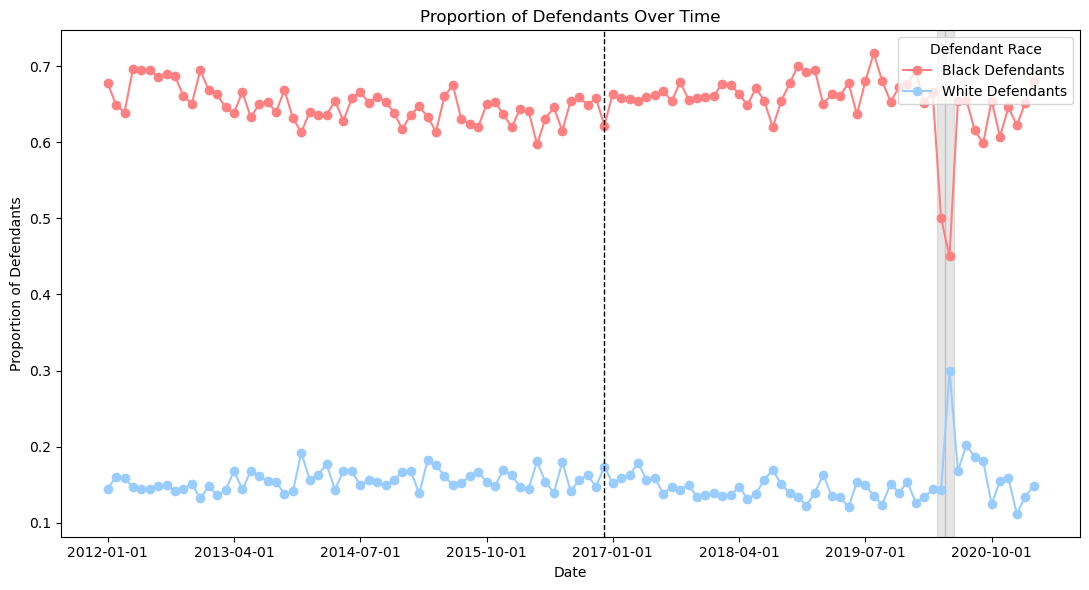

In [86]:
## Creating a graph with two lines

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))

plt.plot(props['sentenceym_derived'].astype(str), props['black_proportion'], label='Black Defendants', color='#ff8080', marker='o')

plt.plot(props['sentenceym_derived'].astype(str), props['white_proportion'], label='White Defendants', color='#99ccff', marker='o')

plt.xlabel('Date')
plt.ylabel('Proportion of Defendants')
plt.title('Proportion of Defendants Over Time')

plt.legend(title='Defendant Race', loc='upper right')

# Fixing x-axis issue
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12)) 

# Adding the vertical line for when the attorney took office
vertical_line_date = '2016-12-01'
plt.axvline(x=vertical_line_date, color='black', linestyle='--', linewidth=1)

# Shading the background
for i, row in props.iterrows():
    if row['total_cases'] < 100:
        plt.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.2)

plt.tight_layout()
plt.show()

In [87]:
# Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020?

### Black Defendants: 
$
\
\frac{\sum_{n=1}^{N} \text{black\ defendants}}{\sum_{n=1}^{N} (\text{black\ defendants} + \text{white\ defendants})}
\
$

### White Defendants: 
$
\
\frac{\sum_{n=1}^{N} \text{white\ defendants}}{\sum_{n=1}^{N} (\text{black\ defendants} + \text{white\ defendants})}
\
$

##### Trends: In May and April, the proportion of black defendants decreased drastically and the proportion of white defendants increased. This could be due to the small sample size of these particular months having less than 100 cases.

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

In [89]:
# New data table for graph
props2 = dx.groupby('sentenceym_derived').agg(
    total_cases=('CASE_ID', 'nunique'),  
    black_count=('is_black_derived', 'sum'), 
    white_count=('is_white_derived', 'sum'),
    black_incarcerated=('COMMITMENT_TYPE', lambda x: ((x == 'Illinois Department of Corrections') & (dx.loc[x.index, 'is_black_derived'])).sum()),
    white_incarcerated=('COMMITMENT_TYPE', lambda x: ((x == 'Illinois Department of Corrections') & (dx.loc[x.index, 'is_white_derived'])).sum()),

).reset_index()

props2['black_inc_percent'] = props2['black_incarcerated'] / props['black_count']
props2['white_inc_percent'] = props2['white_incarcerated'] / props['white_count']
props2['diff_inc'] = props2['black_inc_percent'] - props2['white_inc_percent']

# Smoothed for graph using link in slides
props2['smooth_diff'] = props2['diff_inc'].rolling(3).mean()

#props2


<Figure size 1100x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Difference between Black Incarceration and White Incarceration (%)')

Text(0.5, 1.0, 'Difference between Black Incarceration and White Incarceration over Time')

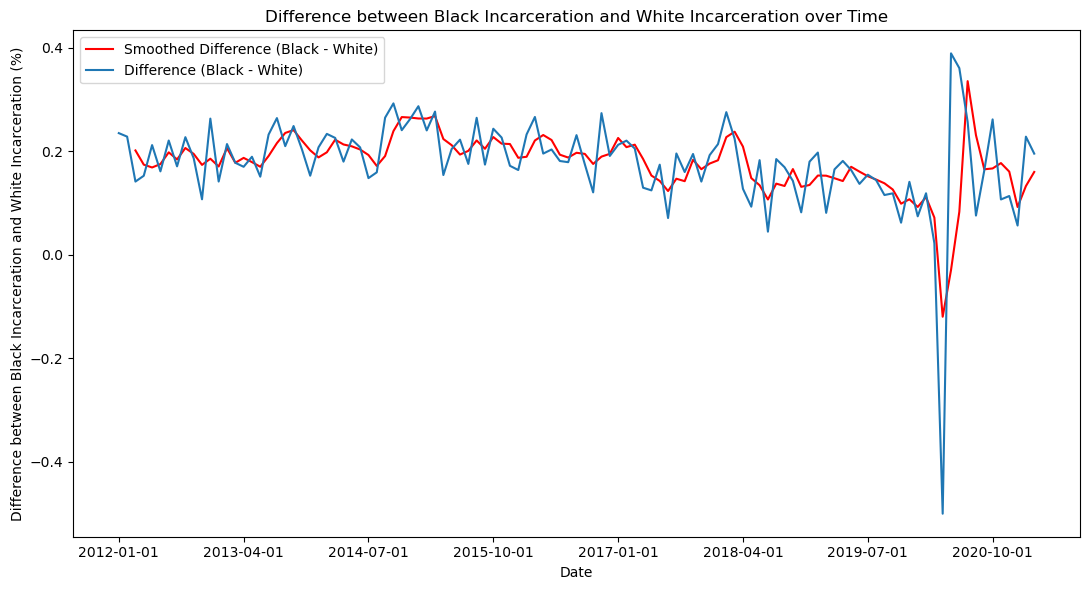

In [94]:
# Plot representing the difference

plt.figure(figsize=(11, 6))

plt.plot(props2['sentenceym_derived'].astype(str), props2['smooth_diff'], label='Smoothed Difference (Black - White)', color='red')
plt.plot( props2.diff_inc, label = 'Difference (Black - White)' )

plt.xlabel('Date')
plt.ylabel('Difference between Black Incarceration and White Incarceration (%)')
plt.title('Difference between Black Incarceration and White Incarceration over Time')

#fixing x-axis issue
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12)) 

plt.legend()
plt.tight_layout()
plt.show()

#### Observations/Answer: Since 2014, the gap between black and white incarceration seemed to be narrowing (as indicated in the graph), despite a spike in 2020-2021. 

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [96]:
black_offense_counts = dx[dx['is_black_derived']]['simplified_offense_derived'].value_counts()
ten_black = set(black_offense_counts.index[:10])
#ten_black

white_offense_counts = dx[dx['is_white_derived']]['simplified_offense_derived'].value_counts()
ten_white = set(white_offense_counts.index[:10])
#ten_white

top_ten = ten_black.union(ten_white)
top_ten


{'Battery',
 'Burglary',
 'DUI',
 'Driving With Suspended Or Revoked License',
 'Narcotics',
 'Other Offense',
 'Residential Burglary',
 'Retail Theft',
 'Robbery',
 'Theft',
 'UUW - Unlawful Use of Weapon',
 'Vehicle-related'}

### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [98]:
# Created a table (confirmed that the structure was acceptable during office hours)

props3 = dx.groupby('simplified_offense_derived').agg(
    total_cases=('CASE_ID', 'nunique'),  
    black_incarcerated_offense=('COMMITMENT_TYPE', lambda x: ((x == 'Illinois Department of Corrections') & (dx.loc[x.index, 'is_black_derived'])).sum()),
    white_incarcerated_offense=('COMMITMENT_TYPE', lambda x: ((x == 'Illinois Department of Corrections') & (dx.loc[x.index, 'is_white_derived'])).sum()),

).reset_index()

props3['black_inc_percent_offense'] = props3['black_incarcerated_offense'] / props3['total_cases']
props3['white_inc_percent_offense'] = props3['white_incarcerated_offense'] / props3['total_cases']
props3['difference'] = props3['black_inc_percent_offense'] - props3['white_inc_percent_offense'] 

final_table = props3[props3['simplified_offense_derived'].isin(top_ten)]

# Printing out the final table
final_table[['simplified_offense_derived', 'black_inc_percent_offense', 'white_incarcerated_offense', 'difference']]


,simplified_offense_derived,black_inc_percent_offense,white_incarcerated_offense,difference
5,Battery,0.318488,399,0.264801
8,Burglary,0.390919,779,0.269787
15,DUI,0.120136,682,0.067480
20,Driving With Suspended Or Revoked License,0.319508,576,0.248615
39,Narcotics,0.408484,1194,0.377695
42,Other Offense,0.190112,131,0.131236
50,Residential Burglary,0.444143,469,0.316974
51,Retail Theft,0.384790,1128,0.277830
52,Robbery,0.509510,132,0.465465
56,Theft,0.231418,349,0.151847


#### Unlawful use of weapons shows the largest disparity in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation.

### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


   Bandwidth    Pre-Gap    Post-Gap  Pre-SE  Post-SE
0          2  85.445882  107.222460     NaN      NaN
1          4  55.917158   98.074136     NaN      NaN
2          8  35.515334   62.084200     NaN      NaN
3         12  24.319710   51.179000     NaN      NaN


/var/folders/q4/7sz5khj51k3c5cv3fz08lsb40000gn/T/ipykernel_89044/3940229110.py:20: RuntimeWarning: invalid value encountered in scalar power
  forcheck = lambda p, n: (((p * (1 - p)) / n) ** 0.5) if n > 0 else 0


<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Bandwidth (Months)')

Text(0, 0.5, 'Black-White Incarceration Gap')

Text(0.5, 1.0, 'Disparities in Incarceration Rates Before and After Policy Change')

[Text(0, 0, '2'), Text(1, 0, '4'), Text(2, 0, '8'), Text(3, 0, '12')]

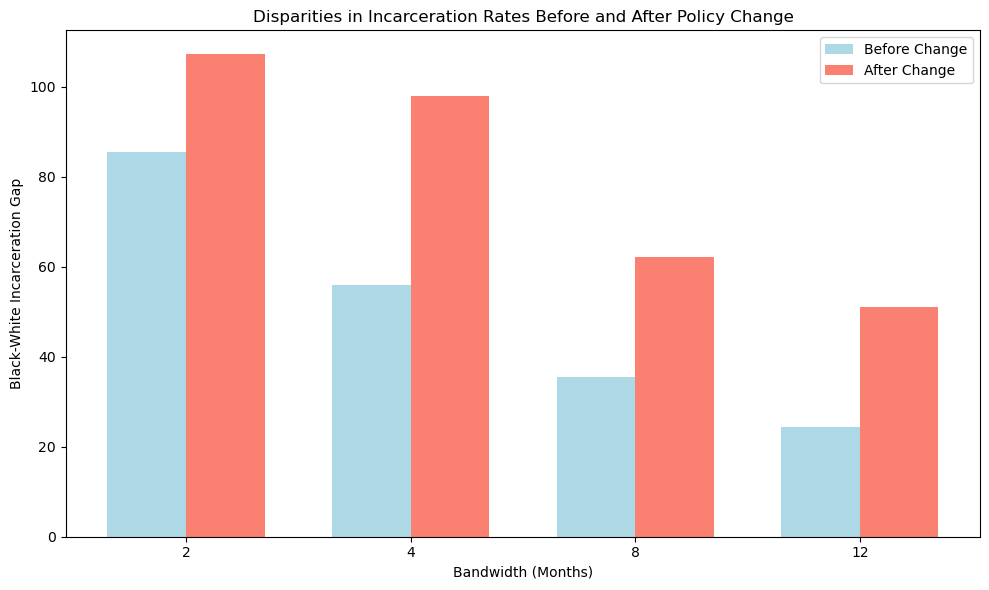

In [99]:
from datetime import datetime, timedelta

dx['sentenceym_derived'] = pd.to_datetime(dx['sentenceym_derived'])

# Define bandwidths for comparison
bandwidths = {
    2: [('2016-10-01', '2016-11-30'), ('2017-01-01', '2017-02-28')],
    4: [('2016-08-01', '2016-11-30'), ('2017-01-01', '2017-04-30')],
    8: [('2016-04-01', '2016-11-30'), ('2017-01-01', '2017-04-30')],
    12: [('2015-12-01', '2016-11-30'), ('2017-01-01', '2017-12-31')]
}

timeperiods = bandwidths.keys()
centraltime = datetime(2016, 12, 1)

# Filter for retail theft cases
retail_theft = dx[dx.simplified_offense_derived == "Retail Theft"]

# Function to calculate standard error
forcheck = lambda p, n: (((p * (1 - p)) / n) ** 0.5) if n > 0 else 0

beforeperiod = []
afterperiod = []
preforecheck = []
aftforecheck = []

# Loop through each bandwidth
for t in timeperiods:
    cut_upper = centraltime + timedelta(days=31) + timedelta(days=(t + 1) * 30)
    cut_lower = centraltime - timedelta(days=t * 30)
    cut_lower, cut_upper = cut_lower.replace(day=1), cut_upper.replace(day=1)
    
    # Filter data for pre and post periods
    firstretail = retail_theft[(retail_theft.sentenceym_derived >= cut_lower) & (retail_theft.sentenceym_derived <= centraltime)]
    secondretail = retail_theft[(retail_theft.sentenceym_derived >= datetime(2017, 1, 1)) & (retail_theft.sentenceym_derived <= cut_upper)]
    
    # Calculate gaps for Black and White incarceration rates

    # Determining cases
    case1 = ((props3.black_incarcerated_offense.sum() / firstretail.is_black_derived.sum()) -
             (props3.white_incarcerated_offense.sum() / firstretail.is_white_derived.sum())) if firstretail.is_black_derived.sum() > 0 and firstretail.is_white_derived.sum() > 0 else float('nan')
    
    case2 = ((props3.black_incarcerated_offense.sum() / secondretail.is_black_derived.sum()) -
             (props3.white_incarcerated_offense.sum() / secondretail.is_white_derived.sum())) if secondretail.is_black_derived.sum() > 0 and secondretail.is_white_derived.sum() > 0 else float('nan')

    # Count total cases for each group
    firstpart = firstretail.is_black_derived.sum() + firstretail.is_white_derived.sum()
    secondpart = secondretail.is_black_derived.sum() + secondretail.is_white_derived.sum()
    
    # Store results
    beforeperiod.append(case1)
    afterperiod.append(case2)
    preforecheck.append(forcheck(case1, firstpart))
    aftforecheck.append(forcheck(case2, secondpart))
# Create a results DataFrame
results_df = pd.DataFrame({
    'Bandwidth': timeperiods,
    'Pre-Gap': beforeperiod,
    'Post-Gap': afterperiod,
    'Pre-SE': preforecheck,
    'Post-SE': aftforecheck
})

print(results_df)

# Create a bar chart to visualize the disparities
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(results_df['Bandwidth']))
width = 0.35

# Pre-Gap bars
ax.bar([i - width/2 for i in x], results_df['Pre-Gap'], width, yerr=results_df['Pre-SE'], label='Before Change', color='lightblue')
# Post-Gap bars
ax.bar([i + width/2 for i in x], results_df['Post-Gap'], width, yerr=results_df['Post-SE'], label='After Change', color='salmon')

ax.set_xlabel('Bandwidth (Months)')
ax.set_ylabel('Black-White Incarceration Gap')
ax.set_title('Disparities in Incarceration Rates Before and After Policy Change')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Bandwidth'])
ax.legend()

plt.tight_layout()
plt.show()




### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 

#### Analysis: The results show that the new policy might have increased disparities as evidenced by the before Black-White Incarceration Gap being smaller than the after policy at each period. However, there is also an argument that the policy decreased disparities if you look at the percent change between the pre and post-policy results throughout the year. There appears to be a larger proportion of decrease throughout the periods in the after policy data compared to the before policy. For example, between the periods 4 and 8, the before data showed a smaller proportion of decrease compared to the after data.